<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr -qq
!pip install yfinance==0.2.59 -qq
!pip install ta -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.1/533.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2026-02-02 14:24:03
-------------------
qualified stocks: 86
with latest results: 26
still star stocks: 15
-------------------
Initial Investment:  1.30 C
CY Investment:  1.57 C
Reserve:  3.49 K
Current:  1.35 C
-------------------
Today PnL: -1.22 L (-0.89%)
Current PnL: -34.18 L (-21.8%)
CY Booked + Current PnL: -19.44 L (-12.4%)
-------------------
Total profit:  80.86 K
Total loss:  -34.99 L
-------------------
Total Booked + Current PnL: 7.54 L (5.81%)
Total Booked PnL: 41.72 L (32.14%)
Curr Year Booked PnL: 14.74 L (10.89%)
Prev Year Booked PnL: 26.98 L (20.78%)
Est FTT:  2.35 C
Est FTT PnL: 99.69 L (73.67%)
Deployed:  1.30 C
Current:  1.35 C
CAGR/XIRR %: 2.16%


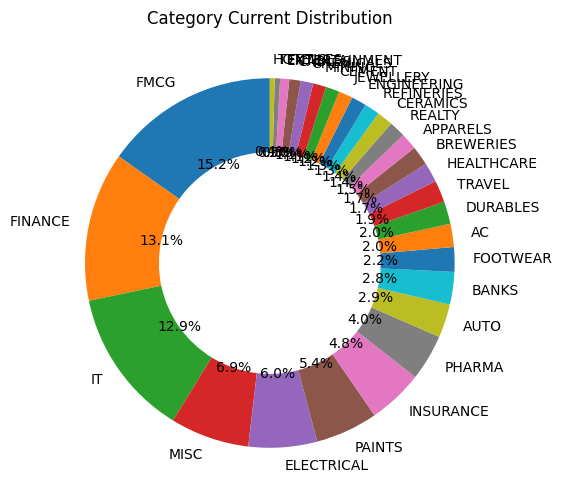

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 1

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'FTT Amt', 'Current P/L', 'Current', 'FTT', 'Dev%_PE', 'RSI_14','Conviction', 'Spread%',  'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'Category']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
list_ox40 = list(tmp_df[tmp_df['MBQ'].str.contains('OX40', na=False)]['Symbol'].values)
list_ox40n = list(tmp_df[tmp_df['MBQ'].str.contains('OX40N', na=False)]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc)- set(list_ox40 + list_ox40n))

In [4]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,FTT,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
18,COALINDIA,-5.15,2.80,15.97,19.23,24702.0,4218.0,154678.0,484.83,21.35,49.0,L-LC,12.45,182.0,0.17,1.14,24.68,XY25,ATH,MINING
77,TTKPRESTIG,-2.77,-26.95,37.01,0.09,27248.0,-27155.0,73622.0,770.00,70.97,32.0,M-SC,6.53,253.0,-1.00,0.54,0.00,OX40N,NTT,DURABLES
50,MASFIN,-4.80,-6.45,30.46,22.05,27921.0,-6315.0,91665.0,398.61,-19.15,45.0,H-SC,3.42,168.0,-0.23,0.68,33.24,XR,ATH,FINANCE
33,HCLTECH,-2.50,8.93,13.68,23.83,36050.0,21600.0,263524.0,1908.19,13.61,52.0,X-LC,7.31,13.0,0.60,1.95,26.43,X40,ATH,IT
51,MEDANTA,8.43,-6.37,32.52,24.08,38653.0,-8092.0,118858.0,1486.00,-13.99,49.0,X-SC,9.39,91.0,-0.21,0.88,8.86,XY24,NTT,HEALTHCARE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,ACC,-3.28,-31.77,140.59,64.15,228248.0,-75601.0,162350.0,3906.00,-60.24,31.0,X-SC,7.25,84.0,-0.33,1.20,0.00,XY24,BTT,CEMENT
8,AWL,2.16,-30.92,127.55,57.19,287356.0,-100838.0,225289.0,485.00,-67.33,34.0,X-MC,15.55,58.0,-0.35,1.67,2.67,XY24,NTT,FMCG
60,REPCOHOME,-3.61,-16.43,127.13,89.82,304405.0,-47061.0,239444.0,880.00,-58.27,41.0,H-SC,1.99,161.0,-0.15,1.77,26.68,XY24,NTT,FINANCE
11,BANDHANBNK,-5.04,-29.36,172.39,92.42,339227.0,-81780.0,196779.0,400.00,38.65,50.0,H-SC,9.82,169.0,-0.24,1.45,13.72,XY24,NTT,BANKS


In [5]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,FTT,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
2,ABBOTINDIA,2.29,-8.60,29.18,18.07,47701.0,-15385.0,163470.0,35195.00,-21.66,41.0,X-MC,8.78,64.0,-0.32,1.21,6.34,X40,ATH,PHARMA
3,ACC,-3.28,-31.77,140.59,64.15,228248.0,-75601.0,162350.0,3906.00,-60.24,31.0,X-SC,7.25,84.0,-0.33,1.20,0.00,XY24,BTT,CEMENT
5,ANGELONE,-6.57,-2.78,27.76,24.20,82378.0,-8500.0,296750.0,3033.00,38.24,41.0,X-SC,2.37,99.0,-0.10,2.19,24.28,X40N,NTT,FINANCE
6,ASIANPAINT,-1.16,-16.11,44.17,20.95,93291.0,-40559.0,211209.0,3460.25,-16.94,23.0,X-LC,10.58,36.0,-0.43,1.56,13.79,X40,ATH,PAINTS
8,AWL,2.16,-30.92,127.55,57.19,287356.0,-100838.0,225289.0,485.00,-67.33,34.0,X-MC,15.55,58.0,-0.35,1.67,2.67,XY24,NTT,FMCG
9,BAJAJHFL,-2.37,-24.04,104.67,55.47,193440.0,-58477.0,184809.0,181.50,-32.76,37.0,X-MC,17.10,63.0,-0.30,1.37,0.75,X40N,ATH,FINANCE
10,BAJAJHLDNG,-1.50,-5.52,36.77,29.22,66047.0,-10503.0,179622.0,14451.52,-8.00,37.0,X-LC,13.83,29.0,-0.16,1.33,0.06,X40,ATH,FINANCE
12,BATAINDIA,0.05,-44.76,144.75,35.20,102890.0,-57589.0,71081.0,2096.00,-6.86,21.0,X-SC,19.87,93.0,-0.56,0.53,1.01,X40,NTT,FOOTWEAR
13,BERGEPAINT,0.42,-17.19,46.28,21.14,87129.0,-39075.0,188264.0,680.00,-22.97,21.0,X-MC,7.28,75.0,-0.45,1.39,0.42,XY24,NTT,PAINTS
16,CAMS,-1.27,-10.09,38.44,24.48,87046.0,-25410.0,226446.0,950.00,-82.87,38.0,X-SC,7.29,86.0,-0.29,1.67,11.27,X40N,NTT,MISC


In [6]:
# OX40N stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(list_ox40n))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,FTT,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
0,5PAISA,-6.57,-37.82,81.57,12.90,110826.0,-82630.0,135866.0,593.00,100.72,41.0,H-SC,6.24,173.0,-0.75,1.00,12.97,OX40N,NTT,FINANCE
17,CERA,0.54,-34.66,89.62,23.89,102999.0,-60974.0,114929.0,9475.00,-36.99,41.0,H-SC,15.70,154.0,-0.59,0.85,2.54,OX40N,NTT,CERAMICS
26,FINCABLES,0.59,-9.44,129.59,107.91,173268.0,-13939.0,133705.0,1641.55,-26.23,39.0,M-SC,10.81,220.0,-0.08,0.99,0.59,OX40N,ATH,CABLES
40,INDIGOPNTS,-0.83,-27.02,37.06,0.02,47209.0,-47174.0,127385.0,1408.00,94.20,29.0,M-SC,6.23,240.0,-1.00,0.94,10.80,OX40N,NTT,PAINTS
45,JCHAC,2.54,-39.92,66.44,-0.01,51014.0,-51023.0,76782.0,2282.00,15617.39,44.0,M-SC,15.23,235.0,-1.00,0.57,6.45,OX40N,BTT,AC
48,KANSAINER,3.34,-22.25,45.95,13.47,96341.0,-60003.0,209664.0,340.00,-68.12,53.0,H-SC,5.30,159.0,-0.62,1.55,6.61,XY24,NTT,PAINTS
55,RAJESHEXPO,-0.28,-68.72,219.95,0.07,94367.0,-94273.0,42904.0,518.00,1471.97,40.0,L-SC,11.92,269.0,-1.00,0.32,6.70,OX40N,NTT,JEWELLERY
63,SFL,1.72,-49.46,150.56,26.63,199525.0,-129696.0,132522.0,1287.00,0.36,34.0,M-SC,15.84,241.0,-0.65,0.98,1.72,XY24,NTT,MISC
66,SIS,2.85,-22.88,57.24,21.26,49014.0,-25403.0,85629.0,528.00,2021.76,55.0,H-SC,4.81,163.0,-0.52,0.63,15.69,OX40N,NTT,MISC
70,SYMPHONY,5.71,-28.72,40.25,-0.03,49100.0,-49154.0,121987.0,1306.00,-42.85,63.0,M-SC,12.88,206.0,-1.00,0.90,12.49,OX40N,NTT,DURABLES


In [7]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,FTT,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
3,ACC,-3.28,-31.77,140.59,64.15,228248.0,-75601.0,162350.0,3906.00,-60.24,31.0,X-SC,7.25,84.0,-0.33,1.20,0.00,XY24,BTT,CEMENT
7,ATULAUTO,5.62,-27.22,100.02,45.57,143492.0,-53669.0,143463.0,844.00,3094.59,49.0,M-SC,8.35,245.0,-0.37,1.06,8.57,XY24,NTT,AUTO
8,AWL,2.16,-30.92,127.55,57.19,287356.0,-100838.0,225289.0,485.00,-67.33,34.0,X-MC,15.55,58.0,-0.35,1.67,2.67,XY24,NTT,FMCG
11,BANDHANBNK,-5.04,-29.36,172.39,92.42,339227.0,-81780.0,196779.0,400.00,38.65,50.0,H-SC,9.82,169.0,-0.24,1.45,13.72,XY24,NTT,BANKS
13,BERGEPAINT,0.42,-17.19,46.28,21.14,87129.0,-39075.0,188264.0,680.00,-22.97,21.0,X-MC,7.28,75.0,-0.45,1.39,0.42,XY24,NTT,PAINTS
15,CAMPUS,6.56,-10.53,48.98,33.28,73520.0,-17673.0,150102.0,393.00,-27.96,58.0,M-SC,5.69,221.0,-0.24,1.11,16.34,XY24,NTT,FOOTWEAR
18,COALINDIA,-5.15,2.80,15.97,19.23,24702.0,4218.0,154678.0,484.83,21.35,49.0,L-LC,12.45,182.0,0.17,1.14,24.68,XY25,ATH,MINING
20,COLPAL,0.20,-19.62,76.04,41.51,160977.0,-51665.0,211700.0,3726.84,-4.32,49.0,X-MC,7.69,65.0,-0.32,1.56,3.44,XY25,ATH,FMCG
21,DABUR,-1.56,-2.50,47.38,43.70,114598.0,-6198.0,241870.0,735.00,-10.52,40.0,X-MC,2.95,73.0,-0.05,1.79,12.18,XY24,BTT,FMCG
25,EASEMYTRIP,0.48,-65.01,316.40,45.70,195744.0,-114949.0,61866.0,26.40,-35.81,30.0,M-SC,24.56,207.0,-0.59,0.46,1.93,XY24,NTT,TRAVEL


In [8]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,FTT,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
1,ABB,-1.33,-0.91,46.90,45.57,121587.0,-2371.0,259248.0,7934.00,-36.30,64.0,H-MC,6.89,121.0,-0.02,1.92,15.12,AR,NTT,ELECTRICAL
4,ALKYLAMINE,-1.94,-33.94,193.11,93.63,128799.0,-34266.0,66697.0,4546.37,-29.23,43.0,H-SC,16.57,143.0,-0.27,0.49,0.83,SR,ATH,CHEMICALS
14,BSOFT,3.22,-23.29,96.57,50.79,104189.0,-32763.0,107890.0,831.70,-1.43,52.0,H-SC,5.94,171.0,-0.31,0.80,25.62,XR,ATH,IT
19,COFFEEDAY,-1.02,-49.10,165.78,35.27,95808.0,-55757.0,57792.0,80.00,-61.77,34.0,L-SC,11.09,268.0,-0.58,0.43,41.45,XR,NTT,HOTELS
22,DEN,-0.43,-47.66,171.44,42.07,75790.0,-40256.0,44208.0,75.00,58.03,31.0,M-SC,12.27,236.0,-0.53,0.33,1.54,AR,NTT,ENTERTAINMENT
30,HAPPSTMNDS,0.47,-49.42,265.47,84.85,172088.0,-63341.0,64824.0,1480.71,-39.93,25.0,H-SC,21.73,153.0,-0.37,0.48,0.47,AR,ATH,IT
31,HATHWAY,-0.09,-41.56,196.51,73.29,124862.0,-45180.0,63540.0,31.40,639.13,33.0,H-SC,17.87,172.0,-0.36,0.47,3.62,XR,NTT,ENTERTAINMENT
38,IEX,-4.92,-18.19,81.67,48.63,133601.0,-36368.0,163586.0,219.00,-45.48,31.0,H-SC,14.68,137.0,-0.27,1.21,0.00,XR,NTT,MISC
39,INDIAMART,0.81,-5.76,119.36,106.72,138731.0,-7107.0,116229.0,4810.62,-53.30,49.0,H-SC,9.06,138.0,-0.05,0.86,16.27,AR,ATH,MISC
41,INDUSINDBK,-0.61,-34.08,101.59,32.89,51704.0,-26312.0,50895.0,1800.00,-728.69,50.0,L-MC,11.28,259.0,-0.51,0.38,40.16,XR,NTT,BANKS


In [9]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,20.75
1,20,37.31
2,30,51.95


In [10]:
# market-cap-wise allocation
df_portfolio_features[cols].groupby(df_portfolio_features['Conviction'].str[-2:])['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
SC,45.09
MC,30.61
LC,24.32


In [11]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,26.39
X40,24.03
X40N,14.88
AR,8.88
XR,8.75
XY25,8.67
OX40N,7.50
SR,0.92


In [12]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
X-MC,23.98
H-SC,22.97
X-LC,20.81
M-SC,11.13
X-SC,10.24
H-MC,4.80
M-MC,1.45
M-LC,1.24
L-LC,1.14


In [13]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
X40       X-LC          11.19
          X-MC          10.39
XY24      H-SC           9.68
X40N      X-MC           5.72
XR        H-SC           5.70
X40N      X-SC           5.37
XY24      M-SC           5.22
          X-MC           4.85
OX40N     M-SC           3.94
X40N      X-LC           3.79
AR        H-SC           3.43
          H-MC           3.35
OX40N     H-SC           3.24
XY25      X-LC           3.06
          X-MC           3.02
XY24      X-LC           2.77
X40       X-SC           2.45
XY24      X-SC           2.42
          H-MC           1.45
XY25      M-MC           1.45
XR        M-LC           1.24
XY25      L-LC           1.14
AR        H-LC           1.13
XR        M-SC           1.00
AR        M-SC           0.97
SR        H-SC           0.92
XR        L-SC           0.43
          L-MC           0.38
OX40N     L-SC           0.32
Name: CurrAlloc%, dtype: float64

In [14]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
FMCG,15.22,-15.01,54.22
FINANCE,13.06,-18.19,64.72
IT,12.95,-22.05,83.02
MISC,6.91,-39.04,95.92
ELECTRICAL,6.00,-15.56,57.72
PAINTS,5.44,-25.36,43.99
INSURANCE,4.84,-3.71,39.20
PHARMA,4.05,-7.54,41.39
AUTO,2.93,-32.09,77.77


In [15]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,75.1,10161082.0,-19.7,-2001660.0,61.93,6293259.0


In [16]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,60.37,8166411.0,-14.33,-1170002.0,50.3,4107549.0


In [17]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3400609.0
AR,1372075.0
XR,1311407.0
X40,1260104.0
X40N,1107215.0
OX40N,776691.0
XY25,445182.0
SR,295259.0


In [18]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,3687277.0
X-MC,1788922.0
M-SC,1553445.0
X-LC,1076701.0
X-SC,912878.0
H-MC,430096.0
L-SC,190175.0
M-LC,123763.0
H-LC,80149.0


In [19]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          1261549.0
AR        H-SC           948966.0
XY24      M-SC           882485.0
XR        H-SC           847018.0
X40       X-MC           609729.0
XY24      X-MC           489083.0
X40       X-LC           471544.0
X40N      X-MC           447762.0
          X-SC           419615.0
OX40N     M-SC           347839.0
          H-SC           334485.0
XY24      X-SC           314432.0
SR        H-SC           295259.0
XY25      X-MC           242348.0
X40N      X-LC           239838.0
XY24      X-LC           235917.0
          H-MC           217143.0
AR        H-MC           212953.0
XR        M-SC           193114.0
X40       X-SC           178831.0
AR        M-SC           130007.0
XY25      X-LC           129402.0
XR        M-LC           123763.0
          L-SC            95808.0
OX40N     L-SC            94367.0
AR        H-LC            80149.0
XR        L-MC            51704.0
XY25      M-MC            48730.0
          L-LC            24702.0
Name: FTT Amt, dtype: float64

In [20]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
H-SC,24
X-MC,16
M-SC,15
X-LC,12
X-SC,9
H-MC,3
L-SC,2
L-LC,1
L-MC,1
